# [AI 이노베이션 스퀘어] 11기 기본 저녁반
- github: https://github.com/hysKim1/AI_Fundamental
    - [파이썬 공식문서]https://docs.python.org/ko/3/
    - [Numpy 공식문서]https://numpy.org/devdocs/
    - [ML]https://developers.google.com/machine-learning/crash-course/ml-intro?hl=ko
    - [DL]https://www.tensorflow.org/
---

* [1. tensorflow_datasets](#CNN-Review ) <br>
    *  [ load](#load)
        *  [split](#split)
        *  [shuffle_files](#shuffle_files)
        *  [as_supervised](#as_supervised)
        *  [with_info](#with_info)
    *  [batch](#batch)


* [2.TensorFlow Dataset vs Numpy Dataset ](#Transfer-Learning)
    *  [Numpy Dataset](#Numpy Dataset)
    *  [from_tensors](#from_tensors)
    *  [from_tensor_slices](#from_tensor_slices) 
    *  [TensorFlow Dataset](#Numpy Dataset)
        *  [iterable](#iterable)
        *  [성능 최적화:cache](#cache)
        *  [성능 최적화:prefetch](#prefetch)
    
* [3. Transfer Learning](#Transfer Learning ) <br>
    *  [ tensorflow_hub](#tensorflow_hub)
    *  [모델 구성](#모델 구성)
        *  [keras_layer](#keras_layer)
            *  [dtype](#dtype)
            *  [trainable](#trainable)
            *  [input_shape](#input_shape)

---

## tensorflow_datasets
- 구글에서 TensorFlow와 같은  Python ML 프레임워크와 함께 데이터세트 제공

텐서플로우 데이터 공식문서 참고: https://www.tensorflow.org/datasets

In [1]:
import tensorflow_datasets as tfds

In [2]:
import tensorflow as tf

In [3]:
dir(tfds) #   Split, load (데이터 불러올때 사용)  

['GenerateMode',
 'ImageFolder',
 'ReadConfig',
 'Split',
 'TranslateFolder',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'absolute_import',
 'as_numpy',
 'audio',
 'builder',
 'builder_cls',
 'core',
 'decode',
 'disable_progress_bar',
 'division',
 'download',
 'features',
 'image',
 'image_classification',
 'is_dataset_on_gcs',
 'list_builders',
 'load',
 'object_detection',
 'print_function',
 'proto',
 'public_api',
 'question_answering',
 'show_examples',
 'show_statistics',
 'structured',
 'summarization',
 'testing',
 'text',
 'tf_compat',
 'translate',
 'units',
 'version',
 'video',
 'visualization']

tf end to end Kears 예 참고 : https://www.tensorflow.org/datasets/keras_example

### load
- `tfds.load('tf 데이터 이름`)`
- [datasets catalog](https://www.tensorflow.org/datasets/catalog/overview)에서 원하는 데이터세트 찾아서 데이터 이름 넣으면 됨
- 옵션을 잘 이용해서 학습 시켜야함
- 옵션을 바꾸면 Dataset 을 상속 받아 특수한 기능을 제공
    - 이름 앞에만 바뀜 :_OptionsDataset,PrefetchDataset,ShuffleDataset  ...
    - `dir()`동일한 기능을 제공하는것을 확인 가능

이전 시간에 사용한 숫자 이미지 분류한는 MNIST 데이터세트 불러옴

In [4]:
tfds.load('mnist') #test, train 2개 있음

{'test': <PrefetchDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>,
 'train': <PrefetchDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>}

#### shuffle_files
- 데이터 순서를 무작위로 바꿈

In [5]:
tfds.load('mnist',shuffle_files=True)

{'test': <_OptionsDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>,
 'train': <_OptionsDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>}

In [6]:
tfds.load('mnist',shuffle_files=False)

{'test': <PrefetchDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>,
 'train': <PrefetchDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>}

#### split 
- 학습할때 train,test,validation 데이터 분할 가능 (scikit-learn의 `train_test_split`  과 용도 비슷)
    - 단순히 나누기(1:1) : `['train', 'test']`
    - 비율 정하여 나누기  : `'train[80%:]'...`
    
mnist 데이터를 train에 순서 무작위 하여 받아옴

In [7]:
tfds.load('mnist',split='train')  # 전체를 train에 넣음 

<PrefetchDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>

In [8]:
tfds.load('mnist',split=['train','test'])  #1:1비율로 나눔 


[<PrefetchDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>,
 <PrefetchDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>]

In [9]:
tfds.load('mnist',split=['train[80%:]','test[:20%]'])  # 8:2비율로 나눔

[<PrefetchDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>,
 <PrefetchDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>]

#### as_supervised
- as_supervised= False (기본값)
    - `True`: `tf.data.Dataset` 이 지도 학습이 데이터와 라벨이 필요하듯이 (input, label)형태의 **하나의 튜플 형태**를 갖음
        -  ((28, 28, 1), ())
    - `False`, `tf.data.Dataset` dictionary 형태를 갖음 
        - {image: (28, 28, 1), label: ()} 

In [10]:
tfds.load('mnist',split=['train','test'],as_supervised=False) 

[<PrefetchDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>,
 <PrefetchDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>]

In [11]:
tfds.load('mnist',split=['train','test'],as_supervised=True) #길이 2

[<PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>,
 <PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>]

len technique 이용 unpacking

In [12]:
len(tfds.load('mnist',split=['train','test'],as_supervised=True))

2

In [13]:
train,test=tfds.load('mnist',split=['train','test'],as_supervised=True) #길이 2
train

<PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>

#### with_info
설명 추가됨

In [14]:
tfds.load('mnist',split=['train','test'],as_supervised=True,with_info=True)

([<PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>,
  <PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>],
 tfds.core.DatasetInfo(
     name='mnist',
     version=3.0.1,
     description='The MNIST database of handwritten digits.',
     homepage='http://yann.lecun.com/exdb/mnist/',
     features=FeaturesDict({
         'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
         'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
     }),
     total_num_examples=70000,
     splits={
         'test': 10000,
         'train': 60000,
     },
     supervised_keys=('image', 'label'),
     citation="""@article{lecun2010mnist,
       title={MNIST handwritten digit database},
       author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
       journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
       volume={2},
       year={2010}
     }""",
     redistribution_info=,
 ))

In [15]:
len(tfds.load('mnist',split=['train','test'],as_supervised=True,with_info=True)) #길이 2이지만 3개 분할 가능

2

In [16]:
#3개로 unpacking 가능
(x,y),info = tfds.load('mnist',split=['train','test'],as_supervised=True,with_info=True) 

In [17]:
x

<PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>

In [18]:
y

<PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>

In [19]:
info

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)

In [23]:
model =tf.keras.models.Sequential([
    tf.keras.layers.Dense(32,activation='relu',input_shape=(28*28,)), #Dense 1차원
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

위와 아래는 동일한 모델

In [24]:
model =tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)), #Dense 1차원
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy')

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [158]:
X_train,X_test=tfds.load('mnist',split=['train','test'], as_supervised=True,shuffle_files=True)  #1개로 묶어줌
X_train #(28, 28, 1) #바로 넣으면 에러

<_OptionsDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>

##### batch 안 한 경우 
- `ValueError: Input 0 of layer dense_21 is incompatible with the layer: expected axis -1 of input shape to have value 784 but received input with shape [28, 28]`
- 입력 값 간의 차이가 있음을 알 수 있음

In [ ]:
model.fit(X_train) #ValueError

### batch
- 데이터 세트를 각 epoch마다 batch를 지정해줌
- load로 불려온 데이터는 batch 되어있지 않아 적용하면 shape이 바뀜

(28, 28, 1)->( **None**, 28, 28, 1)

In [144]:
train_bs=X_train.batch(128)
train_bs #(None, 28, 28, 1)

<BatchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.uint8, tf.int64)>

In [88]:
model.fit(train_bs, epochs=5)

Epoch 1/5
469/469 [==============================] - 6s 13ms/step - loss: 2.3510
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5867
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4518
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3851
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3518


In [29]:
#tf 데이터 세트 batch 예시 
train=tfds.load('mnist',split='train',as_supervised=True,) 
model =tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)), 
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy')

train_bs=train.batch(64)
model.fit(train_bs)

938/938 [==============================] - 10s 11ms/step - loss: 1.7545


##### as_supervised=False 인 경우
-  `ValueError: Layer sequential expects 1 inputs, but it received 2 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(28, 28, 1) dtype=uint8>, <tf.Tensor 'IteratorGetNext:1' shape=() dtype=int64>]`
- 1 입력이 아닌 2개의 텐서가 입력되어있음
-   as_supervised=False 인 경우 데이터가 딕셔너리 형태로 image,labels mapping 되기 때문  {image: (28, 28, 1), label: ()}

train 의 데이터는 image, labels 두개인데 (28,28,1) 이므로 input_shape부터 작동 못함

In [32]:
train,test=tfds.load('mnist',split=['train','test'], as_supervised=False)   
train

<PrefetchDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>

In [ ]:
model =tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)), 
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy')

train_bs=train.batch(64)
model.fit(train_bs, epochs=2)  #ValueError

---
### TensorFlow Dataset vs Numpy Dataset
 여기서는 왜 TensorFlow에서 Numpy 에서 제공하는 dataset을 사용하지 않는지 알아봄
 
성능 팁:https://www.tensorflow.org/datasets/performances

### Numpy Dataset
tf 공식문서 Numpy 데이터 참고 :https://www.tensorflow.org/tutorials/load_data/numpy?hl=ko
- `tf.keras.datasets.mnist.load_data()`
    - 이전 방식: numpy를 tensor로 바꾸는데 리소스 많이 필요하게됨
- Numpy를 tesor항수에 넣으면 자동으로 바뀜

### Dataset
- 데이터 세트 형태루 만들어주는 함수 
    - `from_tensors`
    - `from_tensor_slices`

#### from_tensors
- TensorDataset
- 주어진 tensor를 기반으로 하나의 데이터세트를 만듦.
    - <TensorDataset shapes: (2, 3), types: tf.int32> 그대로 가져옴

In [94]:
a=tf.data.Dataset.from_tensors([[1,2,3],[4,5,6]])  #(2,3) 그대로 
a

<TensorDataset shapes: (2, 3), types: tf.int32>

In [33]:
a=tf.data.Dataset.from_tensors([[4,5,6]]) #위와 동일한 것을 알 수 있음!(데이터의 길이 중요)
a

<TensorDataset shapes: (1, 3), types: tf.int32>

#### from_tensor_slices
- TensorDataset
- 주어진 텐서들의 slice(보통 하나의 데이터 단위)가 요소로 이루어진 데이터 세트 만듦 
    - <TensorSliceDataset shapes: (3,), types: tf.int32> 
    - 한 데이터의 모양 (1x3)=(3,) 으로 `input_shape`과 동일한 개념

In [95]:
b=tf.data.Dataset.from_tensor_slices([[1,2,3],[4,5,6]]) #(3,)로 받음
b

<TensorSliceDataset shapes: (3,), types: tf.int32>

In [42]:
b=tf.data.Dataset.from_tensor_slices([[4,5,6]]) #위와 동일한 것을 알 수 있음!(데이터의 길이 중요)
b

<TensorSliceDataset shapes: (3,), types: tf.int32>

tf 공식문서 end to end 예. 참고:https://www.tensorflow.org/datasets/keras_example

Numpy의 데이터 형태를  from_tensor_slices에 해당 데이터와 label를 하나의 tuple로 묶어 tf.data.Dataset으로 만듦

In [127]:
#load(as_supervised=True) 와동일
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data() #Numpy


X_train_tf=tf.data.Dataset.from_tensor_slices((X_train,y_train)) # Numpy->tensor
X_train_tf #TensorSliceDataset 변경

<TensorSliceDataset shapes: ((28, 28), ()), types: (tf.uint8, tf.uint8)>

내부적으로 batch 안 되어 있음
- (28, 28) -> (None, 28, 28)으로 변경됨

In [128]:
X_train_tf=X_train_tf.batch(64) #batch 
X_train_tf

<BatchDataset shapes: ((None, 28, 28), (None,)), types: (tf.uint8, tf.uint8)>

In [176]:
# Numpy data set

model =tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # (28,28)
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy')

model.fit(X_train_tf, epochs=2)

Epoch 1/2
938/938 [==============================] - 2s 2ms/step - loss: 1.8199
Epoch 2/2
938/938 [==============================] - 2s 2ms/step - loss: 0.4384


In [177]:
#tf 데이터 세트 비교

train,test=tfds.load('mnist',split=['train','test'], as_supervised=True,shuffle_files=True)  

model =tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),  #(28,28,1)
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy')

train_bs=train.batch(64)
model.fit(train_bs, epochs=2)

Epoch 1/2
938/938 [==============================] - 7s 7ms/step - loss: 1.7296
Epoch 2/2
938/938 [==============================] - 2s 2ms/step - loss: 0.5811


### TensorFlow Dataset

- tensorflow_ds 연습용 데이터 세트
- tf 2.0부터 밀고 있는 기능으로  tensorflow_ds처럼 실무에서도 구성해야한다는 Guideline 제시
- `tf.data.Dataset`  < ...Dataset  >
- 데이터 용량이 크기 때문에 iterable하여 실행 될때 올림

장점 

1. 내부적으로 tensor로 되어있음 
    - GPU 사용 가능 

2. 파이프라인 성능 최적화 가능
    - tf.data.Dataset 사용하면 내부적으로 cashing, autotuning 자동 최적화 가능
    - 학습 속도가 매우 빨라질수 있도록 최적의 조건으로 내부적으로 성능 최적화해줌
        - AUTOTUNE : 성능 자동 최적화 
        - cache: 이전 데이터를 저장하여 epoch시 속도 빠름



- 성능 팁:https://www.tensorflow.org/datasets/performances
- 파이프라인 성능 최적화 참고: https://www.tensorflow.org/guide/data_performance?hl=ko

### iterable

In [111]:
train=tfds.load('mnist',split='train') #길이 2

dir(train) #apply, map, shuffle ->데이터 변경, __iter__ ->for

['_GeneratorState',
 '__abstractmethods__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_add_variable_with_custom_getter',
 '_apply_options',
 '_as_serialized_graph',
 '_buffer_size',
 '_checkpoint_dependencies',
 '_consumers',
 '_deferred_dependencies',
 '_flat_shapes',
 '_flat_structure',
 '_flat_types',
 '_functions',
 '_gather_saveables_for_checkpoint',
 '_graph',
 '_graph_attr',
 '_handle_deferred_dependencies',
 '_has_captured_ref',
 '_input_dataset',
 '_inputs',
 '_list_extra_dependencies_for_serialization',
 '_list_functions_for_serialization',
 '_lookup_dependency',
 '_map_r

In [74]:
train

<PrefetchDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>

- 60,000개 중 1개의 데이터를 봄.
- shape: (28,28,1)

In [75]:
for i in train: 
    print(i)
    break

{'image': <tf.Tensor: shape=(28, 28, 1), dtype=uint8, numpy=
array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
     

as_supervised=False 인경우 dictionary 형태이기 때문에 image , label로 구성됨

In [76]:
for i in train: 
    print(i.keys())
    break

dict_keys(['image', 'label'])


In [77]:
for i in train: 
    print(i['label'])  #숫자 4 
    break

tf.Tensor(4, shape=(), dtype=int64)


In [86]:
train_i = iter(train)
train_i

In [87]:
print(next(train_i))  #for와 동일

{'image': <tf.Tensor: shape=(28, 28, 1), dtype=uint8, numpy=
array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
     

- iterator는  메모리에 한번에 올리지 않고 next 할때마다 데이터를 가져오는 lazy 방식이기 때문에 메모리 효율적
  
- batch() 메서드로 한 번에 가져올 데이터의 수를 지정
- iter() 함수로 이터레이터를 만들어 데이터를 가져옴

In [120]:
train, test = tfds.load(
    "mnist", 
    split=['train','test'], as_supervised=False)
next(iter(train.batch(2)))

{'image': <tf.Tensor: shape=(2, 28, 28, 1), dtype=uint8, numpy=
 array([[[[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
 
         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
 
         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
 
         ...,
 
         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
 
         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
 
         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]]],
 
 
        [[[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
 
         [[0],
          [0],
          [0],
          ...,
          [0],
          [0],
          [0]],
 
         [[0],
          [0],
          [0],
        

In [119]:
print(data[0].keys(), data[0]["image"].shape,data[0]["label"].shape)

dict_keys(['image', 'label']) (2, 28, 28, 1) (2,)


### 성능 최적화

### cache
-  각 에포크 동안 실행되는 일부 작업(파일 열기 및 데이터 읽기 등)이 메모리 또는 로컬 저장소에 캐시하여 재사용 
- 다시 반복하면 훨씬 빨라진것을 알수 있음

### prefetch
- 가져오기라는 의미로 데이터세트에의 요소를 가져와 Dataset을 만듦
- input pippelines 의 마무리에  prefetch를 사하여 현재 처리하고 있는 동안 그다음것을 미리 준비하도록 함
    - 추가적인 메모리가 필요하게됨
- `tf.data.experimental.AUTOTUNE`    
     - tf.data 런타임이 실행 시에 동적으로 값을 조정

In [177]:
#tf 데이터 세트 비교

train,test=tfds.load('mnist',split=['train','test'], as_supervised=True,shuffle_files=True)  

model =tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),  #(28,28,1)
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy')

train_bs=train.batch(64)
model.fit(train_bs, epochs=2)

Epoch 1/2
938/938 [==============================] - 7s 7ms/step - loss: 1.7296
Epoch 2/2
938/938 [==============================] - 2s 2ms/step - loss: 0.5811


In [178]:
train_bs=train_bs.cache()
train_bs=train.batch(64)
train_bs=train_bs.prefetch(tf.data.experimental.AUTOTUNE)

In [180]:
model.fit(train_bs, epochs=2)  #빠르게 해결

Epoch 1/2
938/938 [==============================] - 2s 2ms/step - loss: 0.4348
Epoch 2/2
938/938 [==============================] - 2s 2ms/step - loss: 0.3678


---

### Transfer Learning
- 전이학습
- 기존에 이미 다른 도메인의 데이터로 만들어진 모델을 가져와서 일부만 수정해서 새로운 도매인에도 사용 가능
- **소규모 데이터로도 학습**이 가능해지면서 모델 재사용
    - 실존에서는 압도적으로 데이터가 많이 필요해서 데이터가 부족해서 못하는 경우가 다수
- 일반화 개선
- 학습 속도 개선
    
 Model A에서 얻은 지식으fh 다른 관련되었지만 다른 문제를 풀기위해서 전이하여 적용
 - 예. 모델 A 고양이 분류하는 모델을 전이학습하면 개도 분류 할 수 있음

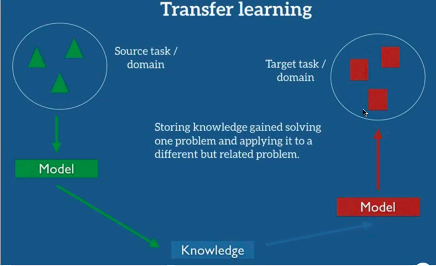

TF hub 이용한 텍스트 분류 참고: https://www.tensorflow.org/tutorials/keras/text_classification_with_hub?hl=ko


### Transfer Learning vs Machine Learning 

전통적인 기계학습은 동시에 전이가 불가능하여 따로 따로 모델을 만들어 사용했었음
- 예. 고양이 분류 학습과 개 분류 학습 분리해서 만들어야 했음

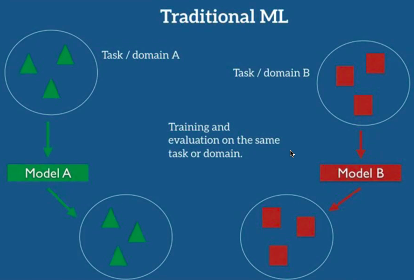

### tensorflow_hub
- 사전 학습된  유명한 딥러닝 모델들을 transfer learning 하여 재사용 할 수 있도록 Problem domain 별로 모아놓은 library
- Problem Domain
    - Text: Classification,Embedding, Generation...
    - Image :Classification, Augmentaion...
    - Video: Classification,Generation,Text
    - Audio: Embedding, Pitch extraction
-  fine tuninig : 모델 수정 가능 여부
    
- tensorflow에서만 사용할 수 있도록 tensor 포맷

tf hub 참고: https://tfhub.dev/s?subtype=module,placeholder

!pip install -U tensorflow-hub

In [53]:
import tensorflow_hub as hub #학습된 모델 가져올 수 있음 

In [54]:
dir(hub)                     #load: 만들어진 모델 가져오기 (Dataset과 동일)

['ImageModuleInfo',
 'KerasLayer',
 'LatestModuleExporter',
 'LooseVersion',
 'Module',
 'ModuleSpec',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_run',
 'absolute_import',
 'add_signature',
 'attach_image_module_info',
 'attach_message',
 'compressed_module_resolver',
 'config',
 'create_module_spec',
 'create_module_spec_from_saved_model',
 'division',
 'estimator',
 'eval_function_for_module',
 'feature_column',
 'feature_column_v2',
 'get_expected_image_size',
 'get_num_image_channels',
 'image_embedding_column',
 'image_module_info_pb2',
 'image_util',
 'keras_layer',
 'load',
 'load_module_spec',
 'logging',
 'meta_graph_lib',
 'module',
 'module_attachment_pb2',
 'module_def_pb2',
 'module_impl',
 'module_spec',
 'module_v2',
 'native_module',
 'print_function',
 'register_module_for_export',
 'registry',
 'resolve',
 'resolver',
 'saved_model_lib',
 'saved_model_mod

tf 공식 문서 케라스와 텐서플로 허브를 사용한 영화 리뷰 텍스트 분류하기 참고: https://www.tensorflow.org/tutorials/keras/text_classification_with_hub?hl=ko

`tensorflow_datasets`을 이용하여 데이터를 불러옴

In [55]:
# 훈련, 테스트로 1:1로 25,000개 씩 나눔
train_data, test_data = tfds.load(
    name="imdb_reviews", 
    split=('train', 'test'),
    as_supervised=True)

In [75]:
len(train_data),len(test_data)

(25000, 25000)

### 모델 구성 
- 텍스트 표현 :하나의 문장을 임베딩 벡터로 매핑
- 모델 층 갯수
- 층 노드 갯수


1. 첫 번째 층: **텐서플로 허브 층** 
    -  사전 훈련된 모델을 사용
2. 두 번째 층:고정 크기의 출력 벡터는 16개의 은닉 유닛(hidden unit)을 가진 완전 연결 층(Dense)
3. 마지막 층 : 하나의 출력 노드를 가진 fully connected 층. 
    - 이진 분류 이므로 sigmoid 활성화 함수를 사용 0~1사이의 확률 표현


### hub.keras_layer
- TF2 포맷에서 TF Hub모듈에서 사전 학습되 모델을 사용하는 Keras Layer 만듦
 - `hub.keras_layer.KerasLayer("주소", trainable , input_shape, dtype )`
 
 - 이미 학습된 embedding model 사용 : 서로 관계를 고려해서 벡터 형태로 만들어주는  레이어를 가져옴 
     -  텍스트 전처리 불필요(예 zero padding)
     -  전이학습의 장점 활용
     
사전 훈련된 텍스트 임베딩 모델: google/tf2-preview/gnews-swivel-20dim/1을 사용
-  하나의 문장을 토큰(token)으로 나누고 각 토큰의 임베딩을 연결하여 반환
- 최종 차원 (num_examples, embedding_dimension)

In [56]:
hub.load  #TF2의 low level ; keras에서 바로 사용 불가 -> keras_layer사용 추천

<function tensorflow_hub.module_v2.load(handle, tags=None, options=None)>

In [ ]:
hub.keras_layer.KerasLayer("https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1")

#### dtype
- input의 데이터 타입
    - tf.string: 문자열 

dtype 지정 안한 경우

In [65]:
#dtype 없는경우 ValueError
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           trainable=True)
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

ValueError: in user code:

    /Users/MG/opt/anaconda3/lib/python3.7/site-packages/tensorflow_hub/keras_layer.py:236 call  *
        result = f()
    /Users/MG/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/saved_model/load.py:509 _call_attribute  **
        return instance.__call__(*args, **kwargs)
    /Users/MG/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/eager/def_function.py:780 __call__
        result = self._call(*args, **kwds)
    /Users/MG/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/eager/def_function.py:844 _call
        *args, **kwds)
    /Users/MG/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/eager/function.py:2622 canonicalize_function_inputs
        self._flat_input_signature)
    /Users/MG/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/eager/function.py:2713 _convert_inputs_to_signature
        format_error_message(inputs, input_signature))

    ValueError: Python inputs incompatible with input_signature:
      inputs: (
        Tensor("keras_layer_6_input:0", shape=(None,), dtype=float32))
      input_signature: (
        TensorSpec(shape=(None,), dtype=tf.string, name=None))


#### trainable
- 학습 시킬수 있는 레이어를 못하도록 만듦
- `hub.keras_layer.KerasLayer("주소", trainable=False로`) 기본적으로  False로 되어 있음
    -  True:  아주 많은 데이터로 학습 시켜놓았기 때문에 어느정도 성능이 좋고 우리 데이터 추가 학습해서 우리 데이터에 맞게 기존의 학습된 지식이 전이도어 새로운 모델이 됨 

trainable=False 인 경우(기본값) 

- trainable params가 400,373에서 353 개로 됨.
- 전체 모델이 아닌 해당 전이 학습을 위해서 가져온 레이어만 학습이 안됨

In [79]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                            dtype=tf.string,trainable=False)
model = tf.keras.Sequential()
model.add(hub_layer) 
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_12 (KerasLayer)  (None, 20)                400020    
_________________________________________________________________
dense_21 (Dense)             (None, 16)                336       
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 17        
Total params: 400,373
Trainable params: 353
Non-trainable params: 400,020
_________________________________________________________________


In [80]:
#trainable=False여도 해당 레이어만 학습이 안되고 나머지는 학습이 됨
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
model.fit(train_data.batch(256))

98/98 [==============================] - 3s 27ms/step - loss: 3.5740 - acc: 0.5631


trainable=True 인 경우

In [59]:
layer=hub.keras_layer.KerasLayer("https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1", trainable=True)

In [120]:
layer.weights #학습된 레이어의 가중치 가져옴

[<tf.Variable 'Variable:0' shape=(20001, 20) dtype=float32, numpy=
 array([[-0.60565156, -0.01413231,  0.79470503, ...,  0.7346931 ,
         -0.341707  , -0.43011868],
        [-1.2047577 ,  0.21791467,  1.1384295 , ...,  0.74889004,
         -0.41222748,  0.11590002],
        [-1.3130792 , -0.20165846, -1.7422897 , ..., -1.0302742 ,
          1.1531584 ,  0.03316951],
        ...,
        [ 0.13454673, -0.15173355,  0.5368477 , ...,  0.8319293 ,
         -0.61366147, -1.0842572 ],
        [ 0.20673902, -0.1418509 , -0.5856179 , ..., -0.02331898,
          1.6080966 , -0.6525672 ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]], dtype=float32)>]

#### input_shape
- 갯 수 안 정해져 있을 때 어제 사용한 (None,) 대신에 `[]`사용

ValueError: Python inputs incompatible with input_signature:
      inputs: (
        Tensor("keras_layer_7_input:0", shape=(None, None, None), dtype=float32))
      input_signature: (
        TensorSpec(shape=(None,), dtype=tf.string, name=None))

    - input_shape=(None,None)  ->  shape=(None, None, None) 으로 1개씩 더 나옴.

In [ ]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"  #ERROR
hub_layer = hub.KerasLayer(embedding, input_shape=(None,None), 
                           trainable=True)
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

#### 데이터 갯수 미지정 할 경우
- embedding가 데이터가 몇 개들어오는지 모르기 때문에 `input_shape=[]` 
    - 어제한 Text classification 에서 모델 넣기전에 zero padding 했음
    - 오늘은 padding 안해서 몇개 들어오는지 미정  
-  입력 텍스트의 길이에 무관
- embedding가 출력 크기 (num_examples, embedding_dimension)

In [68]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                            dtype=tf.string,trainable=True)

#모델 구성
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_8 (KerasLayer)   (None, 20)                400020    
_________________________________________________________________
dense_15 (Dense)             (None, 16)                336       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


tf.data.Dataset 데이터 사용시에 꼭 batch

In [69]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
model.fit(train_data.batch(64)) # batch!!

391/391 [==============================] - 7s 19ms/step - loss: 2.9454 - acc: 0.6146


만들때 정하는것이 아닌 따로 설정해서 바꾸기도 가능

이전에 학습된것과 사용자의 데이터를 합쳐서 학습하기 때문에 성능이 좋음
- 버전에 매우 민감해서 안 맞으면 문제됨

- 기본 fundamental이므로 여기서부터 고급 가능기본반 바탕으로 실무적인것으로 활용 가능 하도록 하는것이 목표
- 복습하고 고도화 하도록 해야함

모두 수고 하셨습니다~~